<a href="https://colab.research.google.com/github/JamilePolycarpo/MachineLearning-Printer3D-Failer/blob/main/Yolov8andCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytube
!pip install roboflow
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 16.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Us

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="rvUKE42pZxMtA2T76aCW")
project = rf.workspace("3d-printing-failure").project("spaghetti-3d")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.45, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Spaghetti-3D-1 in yolov8:: 100%|██████████| 1442/1442 [00:00<00:00, 2535.48it/s]


In [5]:
from ultralytics import YOLO


model = YOLO("yolov8n.pt")

model.train(data="/content/Spaghetti-3D-1/data.yaml", epochs=5, imgsz=640)

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Spaghetti-3D-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 104MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/Spaghetti-3D-1/train/labels... 515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<00:00, 1934.33it/s]

train: New cache created: /content/Spaghetti-3D-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Spaghetti-3D-1/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 1228.78it/s]


val: New cache created: /content/Spaghetti-3D-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 196. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.51G      2.278      3.183      2.214         25        640: 100%|██████████| 33/33 [00:16<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        100        196     0.0108      0.638     0.0576      0.019



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.32G      2.179      2.776      2.161         13        640: 100%|██████████| 33/33 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        100        196      0.243     0.0969      0.121     0.0493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5       2.2G      2.183      2.673      2.167         23        640: 100%|██████████| 33/33 [00:08<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        100        196      0.198      0.194      0.127     0.0508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.29G      2.146      2.624      2.135         15        640: 100%|██████████| 33/33 [00:10<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        100        196      0.233      0.163      0.116     0.0425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.23G      2.093       2.58       2.06         21        640: 100%|██████████| 33/33 [00:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all        100        196      0.248      0.286      0.163     0.0742



5 epochs completed in 0.023 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]


                   all        100        196      0.249      0.286      0.163     0.0742
         ['spaghetti']        100        196      0.249      0.286      0.163     0.0742
Speed: 0.3ms preprocess, 5.2ms inference, 0.0ms loss, 22.3ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d5f27583100>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/Spaghetti-3D-1/test/images/spaghetti_118_jpg.rf.a8d59692e39d841c3feae584c14a9ac6.jpg: 640x640 1 ['spaghetti'], 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


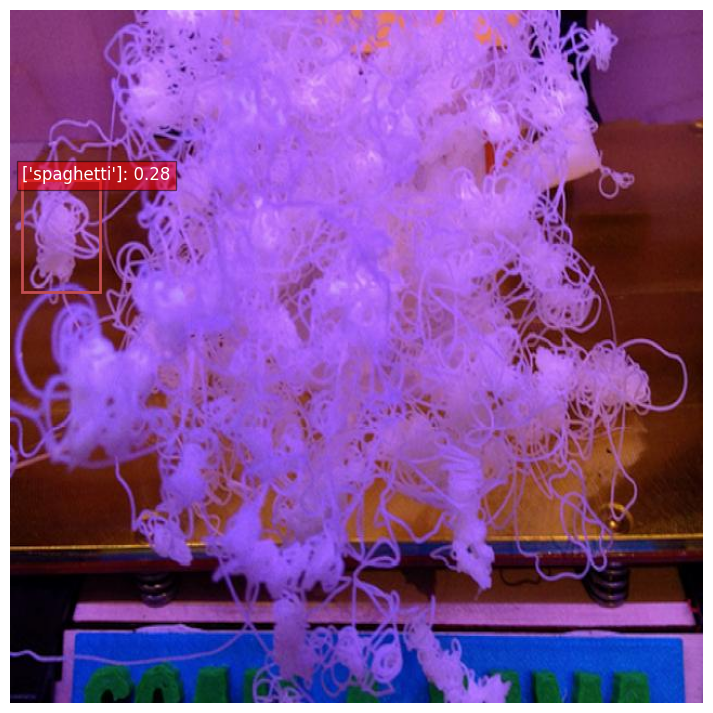

In [9]:
# Carregar o modelo
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

model = YOLO("/content/runs/detect/train3/weights/best.pt")

# Carregar a imagem
image_path = "/content/Spaghetti-3D-1/test/images/spaghetti_118_jpg.rf.a8d59692e39d841c3feae584c14a9ac6.jpg"
image = Image.open(image_path)

# Processar a imagem e obter detecções
results = model(image_path)[0]

boxes = results.boxes
detections = boxes.xyxy.cpu().numpy()
confidences = boxes.conf.cpu().numpy()
class_ids = boxes.cls.cpu().numpy()

# Visualizar detecções
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

for detection, conf, class_id in zip(detections, confidences, class_ids):
      x1, y1, x2, y2 = detection
      rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
      ax.add_patch(rect)
      plt.text(x1, y1, f'{model.names[int(class_id)]}: {conf:.2f}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
      plt.axis('off')
      plt.show()

In [10]:
from roboflow import Roboflow
from ultralytics import YOLO
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

# Baixar o dataset e treinar o modelo (se necessário)
rf = Roboflow(api_key="rvUKE42pZxMtA2T76aCW")
project = rf.workspace("3d-printing-failure").project("spaghetti-3d")
version = project.version(1)
dataset = version.download("yolov8")

# Treinar o modelo YOLOv8
model = YOLO("yolov8n.pt")
model.train(data="Spaghetti-3D-1/data.yaml", epochs=10, imgsz=640)

# Função para construir a CNN
def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


# Função para pré-processar as imagens para a CNN
def preprocess_image(image, target_size=(224, 224)):
    image = image.resize(target_size)
    image = np.array(image)
    image = image / 255.0
    return np.expand_dims(image, axis=0)

# Construir e compilar a CNN
cnn_model = build_cnn(input_shape=(224, 224, 3), num_classes=10)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar a CNN
#cnn_model.fit(dummy_data, dummy_labels, epochs=10, batch_size=32)


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.45, to fix: `pip install ultralytics==8.0.196`
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=Spaghetti-3D-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

train: Scanning /content/Spaghetti-3D-1/train/labels.cache... 515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Spaghetti-3D-1/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 196. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.55G      2.384      3.515      2.408          3        640: 100%|██████████| 33/33 [00:12<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        100        196     0.0138      0.617     0.0845     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.32G      2.297      3.053      2.351         21        640: 100%|██████████| 33/33 [00:13<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        100        196      0.333     0.0714     0.0802     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.32G      2.262      3.008       2.35          8        640: 100%|██████████| 33/33 [00:10<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        100        196     0.0687     0.0663     0.0218    0.00678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.32G      2.261      2.952      2.337         11        640: 100%|██████████| 33/33 [00:10<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all        100        196      0.166     0.0918     0.0546     0.0191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.32G      2.234      2.893      2.331         22        640: 100%|██████████| 33/33 [00:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        100        196      0.177       0.26       0.13      0.044



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.32G      2.164      2.764      2.255         23        640: 100%|██████████| 33/33 [00:09<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]


                   all        100        196       0.22      0.237      0.159     0.0651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.32G      2.139      2.716      2.233         21        640: 100%|██████████| 33/33 [00:10<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

                   all        100        196      0.157      0.281      0.143     0.0633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.32G      2.076      2.618      2.176         12        640: 100%|██████████| 33/33 [00:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        100        196      0.373      0.245      0.215     0.0826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.32G       2.03      2.574      2.157         11        640: 100%|██████████| 33/33 [00:09<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]


                   all        100        196      0.299      0.281      0.206     0.0847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.32G      2.003      2.521      2.118          4        640: 100%|██████████| 33/33 [00:10<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        100        196      0.301      0.235      0.196     0.0801



10 epochs completed in 0.043 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]


                   all        100        196      0.298      0.281      0.207     0.0846
         ['spaghetti']        100        196      0.298      0.281      0.207     0.0846
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train4



image 1/1 /content/Spaghetti-3D-1/test/images/spaghetti_118_jpg.rf.a8d59692e39d841c3feae584c14a9ac6.jpg: 640x640 1 ['spaghetti'], 62.7ms
Speed: 19.4ms preprocess, 62.7ms inference, 15.3ms postprocess per image at shape (1, 3, 640, 640)
1/1 [==============================] - 2s 2s/step


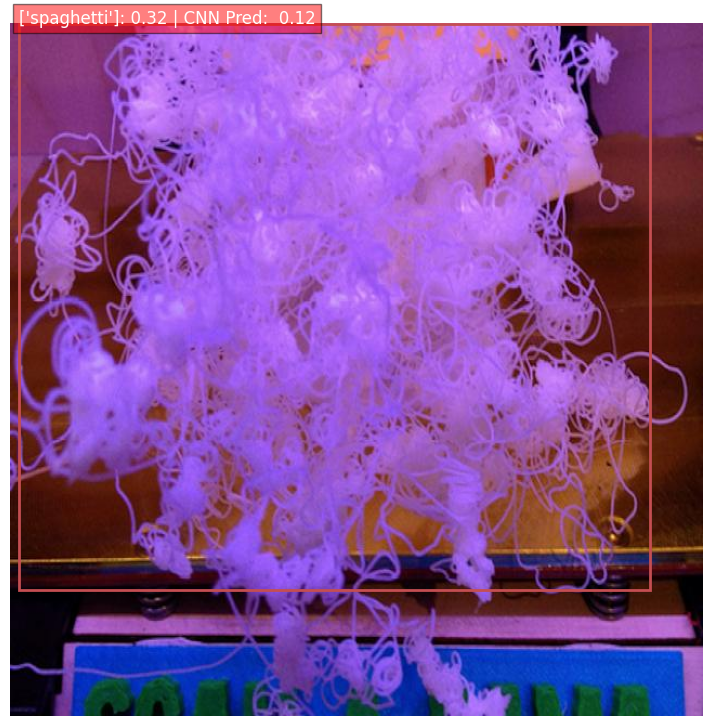

In [11]:
# Carregar o modelo YOLOv8 treinado
model = YOLO("/content/runs/detect/train4/weights/best.pt")

# Carregar a imagem para teste
image_path = "/content/Spaghetti-3D-1/test/images/spaghetti_118_jpg.rf.a8d59692e39d841c3feae584c14a9ac6.jpg"
image = Image.open(image_path)

# Processar a imagem e obter detecções
results = model(image_path)[0]

boxes = results.boxes
detections = boxes.xyxy.cpu().numpy()
confidences = boxes.conf.cpu().numpy()
class_ids = boxes.cls.cpu().numpy()


# Pré-processar a imagem para a CNN, usando o tamanho correto
processed_image = preprocess_image(image, target_size=(224, 224)) # Change the target size to (224, 224)

# Fazer predições com a CNN


prediction = cnn_model.predict(processed_image)
predicted_class = np.argmax(prediction[0])
predicted_confidence = prediction[0][predicted_class]  # Obter a confiança da predição


# Visualizar as detecções e predições na imagem original
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

for i, (detection, conf, class_id) in enumerate(zip(detections, confidences, class_ids)):
    x1, y1, x2, y2 = detection
    rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, y1, f'{model.names[int(class_id)]}: {conf:.2f} | CNN Pred:  {predicted_confidence:.2f}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5)) # Remove [i] from predicted_class and predicted_confidence

plt.axis('off')
plt.show()